In [2843]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [2844]:
# Loading in the dataset
df = pd.read_csv('data2.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2845]:
# Removing columns
df = df.drop(['Unnamed: 32', 'id'], axis = 1)



In [2846]:
# Finding the minimum and maximum values

minimum = df.min()
minimum = minimum.drop('diagnosis', axis = 0)

maximum = df.max()
maximum = maximum.drop('diagnosis', axis = 0)

minmax = pd.concat([minimum, maximum], axis = 1).reset_index()
minmax.rename(columns = {0:'Minimum', 1:'Maximum'}, inplace = True)
minmax.head()

,index,Minimum,Maximum
0,radius_mean,6.981,28.11
1,texture_mean,9.71,39.28
2,perimeter_mean,43.79,188.5
3,area_mean,143.5,2501.0
4,smoothness_mean,0.05263,0.1634


In [2847]:
# Find the population ranges

minmax2 = minmax["Minimum"] = 0.8 * minmax["Minimum"]
minmax3 = minmax["Maximum"] = 1.2 * minmax["Maximum"]

normalised = pd.concat([minmax['index'],minmax2, minmax3], axis = 1)

normalised.rename(columns = {'Minimum':'population_min' ,'Maximum':'population_max'}, inplace = True)

normalised.head()



,index,population_min,population_max
0,radius_mean,5.5848,33.732
1,texture_mean,7.768,47.136
2,perimeter_mean,35.032,226.2
3,area_mean,114.8,3001.2
4,smoothness_mean,0.042104,0.19608


In [2848]:
# Concatenating the above two dataframes
 
new = pd.concat([minimum, maximum], axis = 1).reset_index()

normalised_finish = pd.concat([normalised['index'],normalised['population_min'], new[0], new[1], normalised['population_max']], axis = 1).reset_index()

normalised_finish.rename(columns = {0:'Minimum_value', 1:'Maximum_value'}, inplace = True)

normalised_finish = normalised_finish.drop('level_0', axis = 1)


normalised_finish.head(10)






,index,population_min,Minimum_value,Maximum_value,population_max
0,radius_mean,5.5848,6.981,28.11,33.732
1,texture_mean,7.768,9.71,39.28,47.136
2,perimeter_mean,35.032,43.79,188.5,226.2
3,area_mean,114.8,143.5,2501.0,3001.2
4,smoothness_mean,0.042104,0.05263,0.1634,0.19608
5,compactness_mean,0.015504,0.01938,0.3454,0.41448
6,concavity_mean,0.0,0.0,0.4268,0.51216
7,concave points_mean,0.0,0.0,0.2012,0.24144
8,symmetry_mean,0.0848,0.106,0.304,0.3648
9,fractal_dimension_mean,0.039968,0.04996,0.09744,0.116928


In [2849]:
# This is the normalised dataset created in Excel

data =pd.read_csv('data.csv')
data



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,0.440722,0.066348,0.459114,0.307026,0.495506,0.656922,0.585950,0.609261,...,0.515825,0.154800,3.511479,0.377441,0.500818,0.515936,0.473842,0.760023,0.498838,0.365267
1,842517,M,0.532384,0.254064,0.511948,0.419623,0.276900,0.158245,0.169674,0.290631,...,0.505257,0.276810,2.993739,0.364731,0.318121,0.132050,0.160809,0.532646,0.223129,0.219488
2,84300903,M,0.501119,0.342461,0.496778,0.377009,0.438354,0.361917,0.385426,0.529738,...,0.466779,0.319353,2.867314,0.314899,0.416131,0.322711,0.299787,0.695876,0.351674,0.212462
3,84348301,M,0.207305,0.320362,0.222569,0.093993,0.652024,0.672712,0.471337,0.435719,...,0.232116,0.338818,1.791098,0.084642,0.727287,0.676783,0.457202,0.737400,0.802252,0.629210
4,84358402,M,0.522436,0.166938,0.523456,0.409576,0.377955,0.293993,0.386598,0.431991,...,0.438868,0.141556,2.861294,0.287864,0.382826,0.146797,0.266241,0.465349,0.165634,0.159771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.567556,0.371418,0.559550,0.472630,0.447446,0.251634,0.476218,0.575298,...,0.517722,0.336812,3.140231,0.379055,0.399954,0.151846,0.273363,0.634593,0.120353,0.132304
565,926682,M,0.516751,0.520270,0.503055,0.397104,0.361719,0.220304,0.281162,0.405525,...,0.470030,0.574611,2.917483,0.319337,0.283866,0.136538,0.213991,0.466208,0.196616,0.108983
566,926954,M,0.391338,0.515952,0.383265,0.257518,0.275666,0.217547,0.180627,0.219599,...,0.342402,0.491732,2.349575,0.196875,0.271020,0.230466,0.226504,0.406071,0.143887,0.166699
567,927241,M,0.533449,0.547704,0.549611,0.398489,0.491609,0.655418,0.686114,0.629556,...,0.525580,0.598090,3.511479,0.337495,0.514140,0.678225,0.624800,0.758877,0.422277,0.390149


In [2850]:
# Maps diagnosis to 0 or 1

data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,0.440722,0.066348,0.459114,0.307026,0.495506,0.656922,0.585950,0.609261,...,0.515825,0.154800,3.511479,0.377441,0.500818,0.515936,0.473842,0.760023,0.498838,0.365267
1,842517,1,0.532384,0.254064,0.511948,0.419623,0.276900,0.158245,0.169674,0.290631,...,0.505257,0.276810,2.993739,0.364731,0.318121,0.132050,0.160809,0.532646,0.223129,0.219488
2,84300903,1,0.501119,0.342461,0.496778,0.377009,0.438354,0.361917,0.385426,0.529738,...,0.466779,0.319353,2.867314,0.314899,0.416131,0.322711,0.299787,0.695876,0.351674,0.212462
3,84348301,1,0.207305,0.320362,0.222569,0.093993,0.652024,0.672712,0.471337,0.435719,...,0.232116,0.338818,1.791098,0.084642,0.727287,0.676783,0.457202,0.737400,0.802252,0.629210
4,84358402,1,0.522436,0.166938,0.523456,0.409576,0.377955,0.293993,0.386598,0.431991,...,0.438868,0.141556,2.861294,0.287864,0.382826,0.146797,0.266241,0.465349,0.165634,0.159771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,0.567556,0.371418,0.559550,0.472630,0.447446,0.251634,0.476218,0.575298,...,0.517722,0.336812,3.140231,0.379055,0.399954,0.151846,0.273363,0.634593,0.120353,0.132304
565,926682,1,0.516751,0.520270,0.503055,0.397104,0.361719,0.220304,0.281162,0.405525,...,0.470030,0.574611,2.917483,0.319337,0.283866,0.136538,0.213991,0.466208,0.196616,0.108983
566,926954,1,0.391338,0.515952,0.383265,0.257518,0.275666,0.217547,0.180627,0.219599,...,0.342402,0.491732,2.349575,0.196875,0.271020,0.230466,0.226504,0.406071,0.143887,0.166699
567,927241,1,0.533449,0.547704,0.549611,0.398489,0.491609,0.655418,0.686114,0.629556,...,0.525580,0.598090,3.511479,0.337495,0.514140,0.678225,0.624800,0.758877,0.422277,0.390149


In [2851]:
# Randomly splits the dataset, 70% training - 30% testing

shuffle_df = data.sample(frac=1)

train_size = int(0.7 * len(data))

# Split your dataset 
training = shuffle_df[:train_size]
testing = shuffle_df[train_size:]



In [2852]:
# Input and output variables for training and testing

X_train = training.iloc[:, 2:].values
y_train = training.iloc[:, 1].values

X_test = testing.iloc[:, 2:].values
y_test = testing.iloc[:, 1].values


In [2853]:
# Neural Network activiation functions
def sigmoid(sum):
    return 1 / (1 + np.exp(-sum))
    
def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

# Layers and Neurons
input_nodes = 30
hidden_nodes=15
output_nodes = 2

# Randomised Weights
weight1 = 2*np.random.random((input_nodes, hidden_nodes)) - 1
weight2 = 2*np.random.random((hidden_nodes, output_nodes)) - 1

In [2854]:
learning_rate=0.01
epochs=10000

y_train = y_train[:,None]

train_MSE = []

# Iterates through the network as many times as the epoch is set at
for i in range(epochs):
    
#     Forward Propagate    
    hidden_layer = sigmoid(np.dot(X_train, weight1))

    output_layer = sigmoid(np.dot(hidden_layer, weight2))
    
#     Back Propagate
    error = y_train-output_layer
    
    derivative_output = sigmoid_derivative(output_layer)
    l2_delta = error * derivative_output
    
    derivative_hidden = sigmoid_derivative(hidden_layer)
    l1_delta = l2_delta.dot(weight2.T) * derivative_hidden
    
    weight2 = np.add(weight2, hidden_layer.T.dot(l2_delta) * learning_rate)
    weight1 = np.add(weight1, X_train.T.dot(l1_delta) * learning_rate)

#     Error average at every 1000 epoch
    error_average = np.mean(abs(error))
    
    if i % 1000 == 0:
        print('Epoch: ' + str(i + 0 ) + ' Error: ' + str(error_average))
        train_MSE.append(error_average)




Epoch: 0 Error: 0.4980570404442348
Epoch: 1000 Error: 0.06969280710290268
Epoch: 2000 Error: 0.04960758937431764
Epoch: 3000 Error: 0.03969746335748185
Epoch: 4000 Error: 0.034067967624400834
Epoch: 5000 Error: 0.030381080490356017
Epoch: 6000 Error: 0.0277808780777617
Epoch: 7000 Error: 0.025841896922641838
Epoch: 8000 Error: 0.024324937740114298
Epoch: 9000 Error: 0.02308695665348669


In [2855]:
# Forward Propagate
sum_synapse1 = np.dot(X_test, weight1)
hidden_layer = sigmoid(sum_synapse1) 
        
sum_synapse2 = np.dot(hidden_layer, weight2) 
output_layer = sigmoid(sum_synapse2)



prediction = []
correct = 0

# Iterate testing the length of the output layer
for i in range(171):
    
#     Track the predictions from the testing
    if np.all(output_layer[i] < 0.5):

        predict= 0
    else:
        predict = 1
        

    if predict != y_test[i]:
        
        correct += 0
    else:
        correct += 1
        

                
            
    prediction.append(predict)
    
#     Mean Squared Error from the predication and actual output

MeanSquaredError = np.square(y_test - prediction).mean()


print("Mean Squared Error: ", MeanSquaredError)


Mean Squared Error:  0.017543859649122806


In [2856]:
# Average for mean squared error function
def Average(lst):
    return sum(lst) / len(lst)

In [2857]:
training_avg = Average(train_MSE[1:])

In [2858]:
print('Training MSE: ' + str(training_avg))
print('Testing MSE: ' + str(MeanSquaredError))

Training MSE: 0.03605350859371817
Testing MSE: 0.017543859649122806


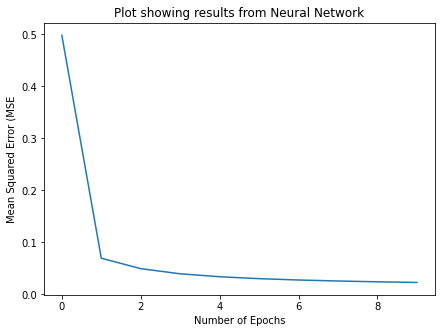

In [2859]:
# MSE vs Epoch

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error (MSE')
plt.title('Plot showing results from Neural Network')
plt.plot(train_MSE)
plt.show()

In [2860]:
epochs

10000

In [2861]:
# Dataframe showing testing predicition vs actual output
prediction_arr = np.array(prediction)
df_from_arr = pd.DataFrame(data=[y_test, prediction_arr]).T
df_from_arr.rename(columns ={0:'Actual', 1: 'Prediction'}, inplace = True)
df_from_arr.head(11)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


In [2862]:
# Confusion Matrix
confusion_matrix = pd.crosstab(df_from_arr['Actual'], df_from_arr['Prediction'])
confusion_matrix

Prediction,0,1
Actual,,
0,103,1
1,2,65


In [2863]:
matrix = np.array(confusion_matrix)
matrix = matrix.reshape(4,1)
matrix

array([[103],
       [  1],
       [  2],
       [ 65]])

In [2864]:
# Assigning variable to each position of array above

TN = int(matrix[0])
FP = int(matrix[1])
FN = int(matrix[2])
TP = int(matrix[3])


In [2865]:
# Performance functions for confusion matrix

def accuracy(TP,TN,FP,FN):
    return (TP + TN) / (TP + TN + FP + FN) * 100

def precision(TP, FP):
    return (TP / (TP + FP)) * 100

def truePositive(TP, FN):
    return (TP / (TP + FN)) * 100

def falsePositive(FP, TN):
    return (FP / (FP + TN)) * 100

def trueNegative(TN,FP):
    return (TN / (TN + FP)) * 100

def falseNegative(FP,TN):
    return (FN / (FN + TP)) * 100




In [2866]:
# Accuracy and Precision
print ('Accuracy ' + str(accuracy(TP, TN, FP, FN)) + ' %')
print('Precision ' + str(precision(TP, FP)) + '%')

Accuracy 98.24561403508771 %
Precision 98.48484848484848%


In [2867]:
# Confusion Matrix Performance 

print('True Positive Rate: ' + str(truePositive(TP, FN)) + '%')
print('False Negative Rate: ' + str(falseNegative(FN , FP)) + '%')
print('True Negative Rate: ' + str(trueNegative(TN,FP)) + '%')
print('False Positive Rate: ' + str(falsePositive(FP, TN)) + '%')

True Positive Rate: 97.01492537313433%
False Negative Rate: 2.9850746268656714%
True Negative Rate: 99.03846153846155%
False Positive Rate: 0.9615384615384616%


In [2868]:
# Neural Network with 5 hidden layers

In [2869]:
hidden_nodes2 = 5

# Randomised Weights
weight1_2 = 2*np.random.random((input_nodes, hidden_nodes2)) - 1
weight2_2 = 2*np.random.random((hidden_nodes2, output_nodes)) - 1

In [2870]:
train_MSE2 = []

# Iterates through the network as many times as the epoch is set at
for i in range(epochs):
    
#     Forward Propagate
    sum_synapse1 = np.dot(X_train, weight1_2)
    hidden_layer2 = sigmoid(sum_synapse1)
        
    sum_synapse2 = np.dot(hidden_layer2, weight2_2) 
    output_layer2 = sigmoid(sum_synapse2)
    
#     Back Propagate
    error = y_train-output_layer2
    
    derivative_output = sigmoid_derivative(output_layer2)
    l2_delta = error * derivative_output
    
    derivative_hidden = sigmoid_derivative(hidden_layer2)
    l1_delta = l2_delta.dot(weight2_2.T) * derivative_hidden
    
    weight2_2 = np.add(weight2_2, hidden_layer2.T.dot(l2_delta) * learning_rate)
    weight1_2 = np.add(weight1_2, X_train.T.dot(l1_delta) * learning_rate)
    
#     Error and epoch
    
    error_average = np.mean(abs(error))
    
    if i % 1000 == 0:
        print('Epoch: ' + str(i + 0 ) + ' Error: ' + str(error_average))
        train_MSE2.append(error_average)


Epoch: 0 Error: 0.4847425666395872
Epoch: 1000 Error: 0.07329590732354214
Epoch: 2000 Error: 0.05035272703215636
Epoch: 3000 Error: 0.04119967037197248
Epoch: 4000 Error: 0.0361755267554854
Epoch: 5000 Error: 0.03213919724560888
Epoch: 6000 Error: 0.02901657813532737
Epoch: 7000 Error: 0.02666520239437775
Epoch: 8000 Error: 0.02482673938488429
Epoch: 9000 Error: 0.0233243625402366


In [2871]:
# Testing
prediction2 = []
correct2 = 0

# Forward Propagate

sum_synapse1 = np.dot(X_test, weight1_2)
hidden_layer2 = sigmoid(sum_synapse1) 
        
sum_synapse2 = np.dot(hidden_layer2, weight2_2) 
output_layer2 = sigmoid(sum_synapse2)

for i in range(171):
    
# Prediction
    if np.all(output_layer2[i]  >= 0.5):

        predict= 1
    else:
        predict = 0

    if predict != y_test[i]:
        
        correct2 += 0
    else:
        
        correct2 +=1
        
    prediction2.append(predict)

MeanSquaredError2 = np.square(y_test - prediction2).mean()


print("Mean Squared Error: ", MeanSquaredError2)





Mean Squared Error:  0.023391812865497075


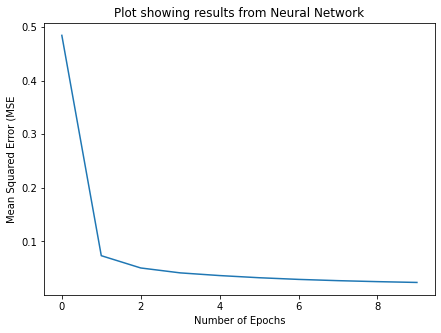

In [2872]:
# MSE vs Epoch

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error (MSE')
plt.title('Plot showing results from Neural Network')
plt.plot(train_MSE2)
plt.show()

In [2873]:
prediction_arr2 = np.array(prediction2)

In [2874]:
# Predition vs Actual output
df_from_arr2 = pd.DataFrame(data=[y_test, prediction_arr2]).T
df_from_arr2.rename(columns ={0:'Actual', 1: 'Prediction'}, inplace = True)
df_from_arr2.head(11)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


In [2875]:
# Confusion Matrix
confusion_matrix2 = pd.crosstab(df_from_arr2['Actual'], df_from_arr2['Prediction'])
confusion_matrix2

Prediction,0,1
Actual,,
0,103,1
1,3,64


In [2876]:
matrix2 = np.array(confusion_matrix2)
matrix2 = matrix2.reshape(4,1)
matrix2

array([[103],
       [  1],
       [  3],
       [ 64]])

In [2877]:
TN_2 = int(matrix2[0])
FP_2 = int(matrix2[1])
FN_2 = int(matrix2[2])
TP_2 = int(matrix2[3])



In [2878]:
# Accuracy and Precision
print ('Accuracy ' + str(accuracy(TP_2, TN_2, FP_2, FN_2)) + ' %')
print('Precision ' + str(precision(TP_2, FP_2)) + '%')

Accuracy 97.6608187134503 %
Precision 98.46153846153847%


In [2879]:
# Confusion Matrix Performance
print('True Positive Rate: ' + str(truePositive(TP_2, FN_2)) + '%')
print('False Negative Rate: ' + str(falseNegative(FN_2,FP_2)) + '%')
print('True Negative Rate: ' + str(trueNegative(TN_2,FP_2)) + '%')
print('False Positive Rate: ' + str(falsePositive(FP_2, TN_2)) + '%')

True Positive Rate: 95.52238805970148%
False Negative Rate: 2.9850746268656714%
True Negative Rate: 99.03846153846155%
False Positive Rate: 0.9615384615384616%


In [2880]:
# Neural Network with 40 hidden layers


In [2881]:
hidden_nodes2 = 40

# Randomised Weights
weight1_3 = 2*np.random.random((input_nodes, hidden_nodes2)) - 1
weight2_3 = 2*np.random.random((hidden_nodes2, output_nodes)) - 1

In [2882]:
train_MSE3 = []

# Iterates through the network as many times as the epoch is set at

for i in range(epochs):
    
#     Forward Propagate
    
    sum_synapse1 = np.dot(X_train, weight1_3)
    hidden_layer = sigmoid(sum_synapse1)
        
    sum_synapse2 = np.dot(hidden_layer, weight2_3) 
    output_layer = sigmoid(sum_synapse2)
    
#     Backward Propagate
        
    error = y_train-output_layer
    
    derivative_output = sigmoid_derivative(output_layer)
    l2_delta = error * derivative_output
    
    derivative_hidden = sigmoid_derivative(hidden_layer)
    l1_delta = l2_delta.dot(weight2_3.T) * derivative_hidden
    
    weight2_3 = np.add(weight2_3, hidden_layer.T.dot(l2_delta) * learning_rate)
    weight1_3 = np.add(weight1_3, X_train.T.dot(l1_delta) * learning_rate)
    
#     Error and epoch
    
    error_average = np.mean(abs(error))
    
    if i % 1000 == 0:
        print('Epoch: ' + str(i + 0 ) + ' Error: ' + str(error_average))
        train_MSE3.append(error_average)
    


Epoch: 0 Error: 0.5177736822639573
Epoch: 1000 Error: 0.06265612875231032
Epoch: 2000 Error: 0.04541347154733279
Epoch: 3000 Error: 0.03728343055662515
Epoch: 4000 Error: 0.03268887932839001
Epoch: 5000 Error: 0.029191374546793297
Epoch: 6000 Error: 0.02664308367158648
Epoch: 7000 Error: 0.024705891588982093
Epoch: 8000 Error: 0.023181834440197963
Epoch: 9000 Error: 0.021945483482967255


In [2883]:
# Testing

prediction3 = []
correct3 = 0

# Forward Propagte
sum_synapse1 = np.dot(X_test, weight1_3)
hidden_layer = sigmoid(sum_synapse1) 
        
sum_synapse2 = np.dot(hidden_layer, weight2_3) 
output_layer3 = sigmoid(sum_synapse2)

for i in range(171):
        
#         Prediction

    if np.all(output_layer3[i] >= 0.5):

        predict3= 1
    else:
        predict3 = 0

    if predict3 != y_test[i]:
        
        correct3 += 0
    else:
        
        correct3 += 1
    
        
        
                
    prediction3.append(predict3)

MeanSquaredError3 = np.square(y_test - prediction3).mean()

print("Mean Squared Error: ", MeanSquaredError3)



Mean Squared Error:  0.011695906432748537


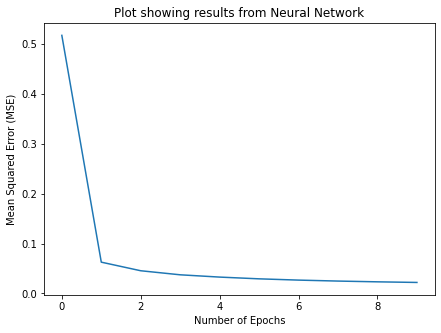

In [2884]:
# MSE vs Epoch
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Plot showing results from Neural Network')
plt.plot(train_MSE3)

plt.show()

In [2885]:
prediction_arr3 = np.array(prediction3)

In [2886]:
# Prediction and Actual Output
df_from_arr3 = pd.DataFrame(data=[y_test, prediction_arr3]).T
df_from_arr3.rename(columns ={0:'Actual', 1: 'Prediction'}, inplace = True)
df_from_arr3.head(11)


,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,0,0


In [2887]:
# Confusion Matrix
confusion_matrix3 = pd.crosstab(df_from_arr3['Actual'], df_from_arr2['Prediction'])
confusion_matrix3

Prediction,0,1
Actual,,
0,103,1
1,3,64


In [2888]:
matrix3 = np.array(confusion_matrix3)
matrix3 = matrix2.reshape(4,1)
matrix3

array([[103],
       [  1],
       [  3],
       [ 64]])

In [2889]:
TN_3 = int(matrix2[0])
FP_3 = int(matrix2[1])
FN_3 = int(matrix2[2])
TP_3 = int(matrix2[3])




In [2890]:
# Accuracy and Precision
print ('Accuracy ' + str(accuracy(TP_3, TN_3, FP_3, FN_3)) + ' %')
print('Precision ' + str(precision(TP_3, FP_3)) + '%')

Accuracy 97.6608187134503 %
Precision 98.46153846153847%


In [2891]:
# Confusion Matrix Performance
print('True Positive Rate: ' + str(truePositive(TP_2, FN_2)) + '%')
print('False Negative Rate: ' + str(falseNegative(FN_2,FP_2)) + '%')
print('True Negative Rate: ' + str(trueNegative(TN_2,FP_2)) + '%')
print('False Positive Rate: ' + str(falsePositive(FP_2, TN_2)) + '%')

True Positive Rate: 95.52238805970148%
False Negative Rate: 2.9850746268656714%
True Negative Rate: 99.03846153846155%
False Positive Rate: 0.9615384615384616%


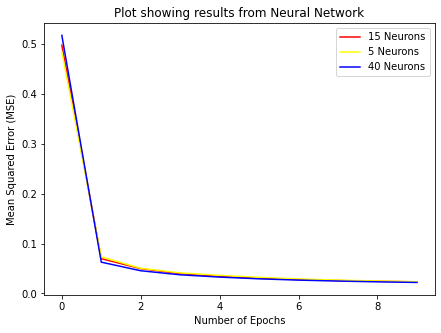

In [2892]:
# All three networks' MSE vs Epoch
plt.rcParams["figure.figsize"] = (7,5)

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Plot showing results from Neural Network')
plt.plot(train_MSE, color = 'red', label = '15 Neurons')
plt.plot(train_MSE2, color = 'yellow', label = '5 Neurons')
plt.plot(train_MSE3, color = 'blue', label = '40 Neurons')
plt.legend(loc="upper right")


plt.show()

In [2893]:
accuracy1 = ((correct/len(y_test))*100)
accuracy2 = ((correct2/len(y_test))*100)
accuracy3 = ((correct3/len(y_test))*100)

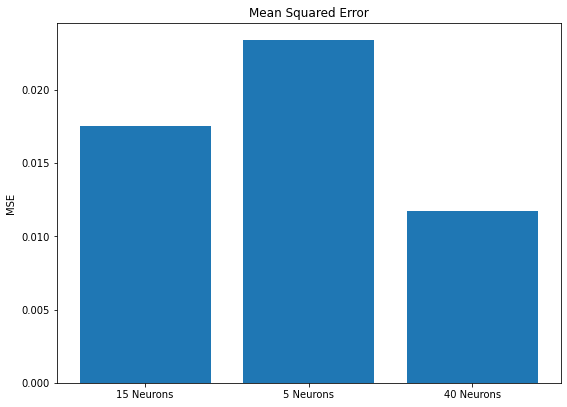

In [2894]:
# All three networks' MSE
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_ylabel('MSE ')
ax.set_title('Mean Squared Error')
neurons = ['15 Neurons', '5 Neurons', '40 Neurons']
labels = [MeanSquaredError, MeanSquaredError2, MeanSquaredError3]
ax.bar(neurons,labels)
plt.show()

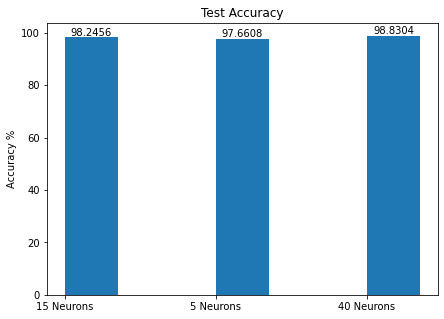

In [2895]:
# All three networks' Accuracy

labels = ['15 Neurons', '5 Neurons', '40 Neurons']
accuracy = [accuracy1, accuracy2, accuracy3]

x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots()
rects2 = ax.bar(x + width/2, accuracy, width)

ax.set_ylabel('Accuracy %')
ax.set_title('Test Accuracy')
ax.set_xticks(x, labels)


ax.bar_label(rects2)

plt.show()